In [26]:
import pandas as pd
import networkx as nx
from itertools import combinations

# Carregar a base de dados
df = pd.read_csv('data_game.csv')
df= df.head(500)

# Filtragem: Selecionar apenas as colunas 'Name' e 'Genre'
df_filtered = df[['Name', 'Genre']].dropna()

# Criar o grafo vazio
G = nx.Graph()

# Adicionar nós ao grafo para cada jogo
G.add_nodes_from(df_filtered['Name'])

# Criar arestas entre jogos que compartilham o mesmo gênero
for genre, group in df_filtered.groupby('Genre'):
    for game1, game2 in combinations(group['Name'], 2):
        G.add_edge(game1, game2)

print("O grafo é conectado?", nx.is_connected(G))

# Verificar componentes
components = list(nx.connected_components(G))
print(f"Número de componentes conectados: {len(components)}")

for i, component in enumerate(components):
    G_component = G.subgraph(component).copy()
    num_nos = G_component.number_of_nodes()
    num_arestas = G_component.number_of_edges()
    densidade = nx.density(G_component)
    clustering_medio = nx.average_clustering(G_component)
    assortatividade = nx.degree_assortativity_coefficient(G_component)
    
    # Centralidade (Top 5)
    betweenness = sorted(nx.betweenness_centrality(G_component).items(), key=lambda x: x[1], reverse=True)[:5]
    closeness = sorted(nx.closeness_centrality(G_component).items(), key=lambda x: x[1], reverse=True)[:5]

    # Número de comunidades
    comunidades = list(nx.community.greedy_modularity_communities(G_component))
    num_comunidades = len(comunidades)

    # Exibir resultados para cada componente
    print(f"\nAnálise do Componente {i + 1}:")
    print(f"Número de nós: {num_nos}")
    print(f"Número de arestas: {num_arestas}")
    print(f"Densidade: {densidade:.4f}")
    print(f"Coeficiente de Clustering Médio: {clustering_medio:.4f}")
    print(f"Assortatividade: {assortatividade:.4f}")
    print(f"Número de comunidades: {num_comunidades}")
    print("---------------------------------------------------------------------------------")
    print("Top 5 Betweenness Centrality:")
    for node, value in betweenness:
        print(f"{node}: {value:.4f}")
    print("---------------------------------------------------------------------------------")
    print("Top 5 Closeness Centrality:")
    for node, value in closeness:
        print(f"{node}: {value:.4f}")



O grafo é conectado? False
Número de componentes conectados: 12

Análise do Componente 1:
Número de nós: 49
Número de arestas: 1183
Densidade: 1.0060
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0030
Número de comunidades: 8
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Kinect Sports: 0.0000
FIFA Soccer 07: 0.0000
Madden NFL 16: 0.0000
FIFA 16: 0.0000
FIFA Soccer 11: 0.0000
---------------------------------------------------------------------------------
Top 5 Closeness Centrality:
Kinect Sports: 1.0000
FIFA Soccer 07: 1.0000
Madden NFL 16: 1.0000
FIFA 16: 1.0000
FIFA Soccer 11: 1.0000

Análise do Componente 2:
Número de nós: 52
Número de arestas: 1331
Densidade: 1.0038
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0019
Número de comunidades: 6
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Croc: Legend of the Gobbos: 0.0000
Don

c:\Users\Usuário\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))



Análise do Componente 3:
Número de nós: 33
Número de arestas: 528
Densidade: 1.0000
Coeficiente de Clustering Médio: 1.0000
Assortatividade: nan
Número de comunidades: 1
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Midnight Club 3: DUB Edition: 0.0000
Mario Kart 7: 0.0000
Gran Turismo 6: 0.0000
Wave Race 64: 0.0000
Gran Turismo 4: 0.0000
---------------------------------------------------------------------------------
Top 5 Closeness Centrality:
Midnight Club 3: DUB Edition: 1.0000
Mario Kart 7: 1.0000
Gran Turismo 6: 1.0000
Wave Race 64: 1.0000
Gran Turismo 4: 1.0000

Análise do Componente 4:
Número de nós: 53
Número de arestas: 1383
Densidade: 1.0036
Coeficiente de Clustering Médio: 1.0000
Assortatividade: -0.0018
Número de comunidades: 6
---------------------------------------------------------------------------------
Top 5 Betweenness Centrality:
Crisis Core: Final Fantasy VII: 0.0000
Pokémon Yellow: Special Pikach

Gêneros únicos no dataset:
Simulation
Adventure
Strategy
Racing
Role-Playing
Action
Platform
Fighting
Sports
Misc
Puzzle
Shooter
Número de gêneros: 12


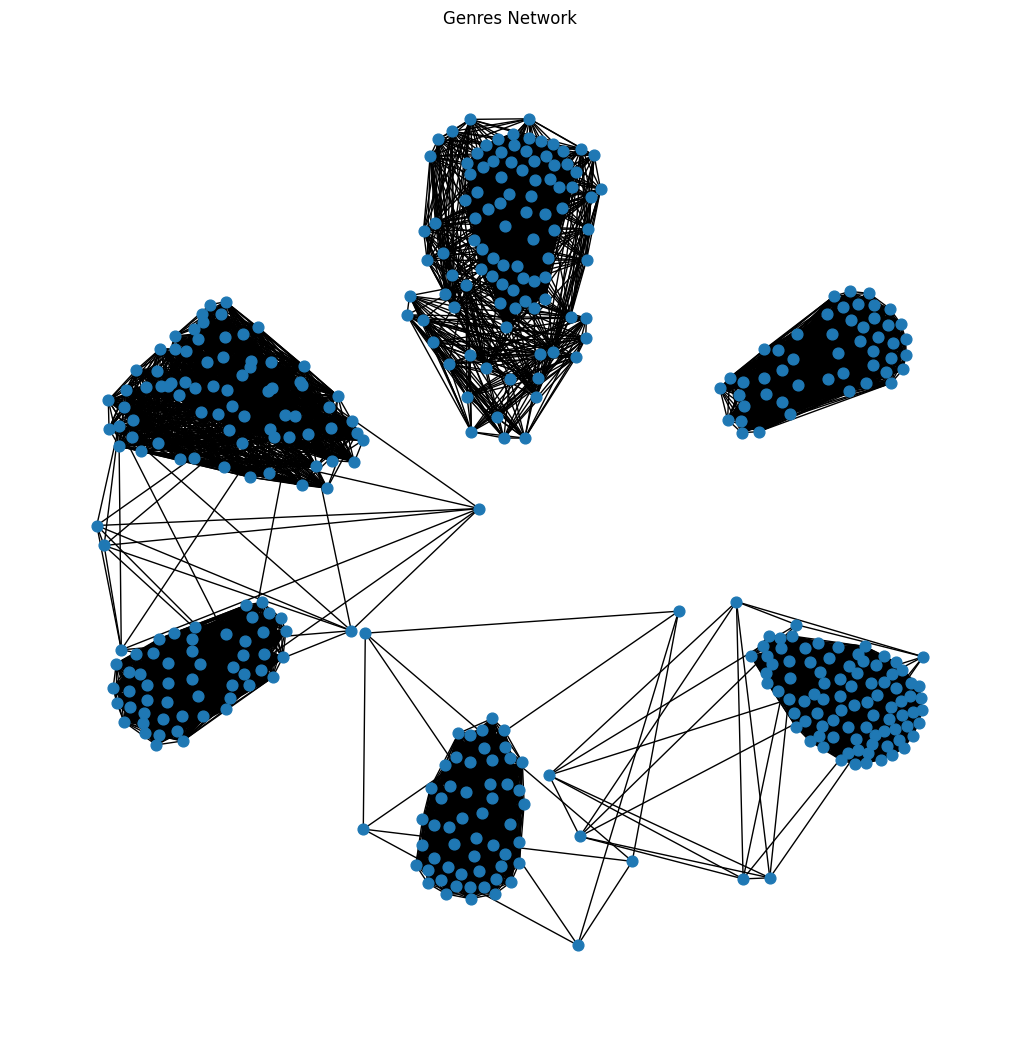

Número de componentes: 12
Componente 1:
Quantidade de jogos: 49
Jogos no componente: World Soccer Winning Eleven 6 International, FIFA 17, EA Sports Active, Madden NFL 16, Pro Evolution Soccer 2008, FIFA Soccer 10, Kinect Sports, FIFA Soccer 08, FIFA 15, Wii Sports, Madden NFL 2005, Tony Hawk's Pro Skater 3, Madden NFL 2002, Mario & Sonic at the Olympic Games, World Class Track Meet, Madden NFL 2003, Tony Hawk's Pro Skater 2, Sports Champions, Tony Hawk's Pro Skater, Baseball, Wii Sports Resort, FIFA Soccer 2003, Mario & Sonic at the Olympic Winter Games, Wii Fit Plus, Madden NFL 06, FIFA Soccer 2004, World Soccer Winning Eleven 8 International, Sega Superstars Tennis, World Soccer Winning Eleven 7 International, Tony Hawk's Pro Skater 4, Madden NFL 07, Madden NFL 2004, NBA 2K13, FIFA Soccer 07, FIFA 12, FIFA 16, Winning Eleven: Pro Evolution Soccer 2007, Tony Hawk's Underground, FIFA Soccer 06, NBA 2K16, FIFA 14, Golf, Mario & Sonic at the London 2012 Olympic Games, FIFA Soccer 11, Wi

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
# Selecionando as 100 primeiras linhas para uma análise
df = df.head(500)

# Filtragem e preparação dos dados
df_genre = df[['Name', 'Genre']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_genres = set()

# Adicionar gêneros ao conjunto
for genres in df_genre['Genre'].str.split(','):
    genres = [genre.strip() for genre in genres]  # Remover espaços em branco
    unique_genres.update(genres)

# Imprimir gêneros únicos
print("Gêneros únicos no dataset:")
for genre in unique_genres:
    print(genre)

number_genres = len(unique_genres)
print(f'Número de gêneros: {number_genres}')

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos gêneros
for _, row in df_genre.iterrows():
    game = row['Name']
    genres = [genre.strip() for genre in row['Genre'].split(',')]  # Dividir múltiplos gêneros
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, genres=genres)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um gênero
    for genre in genres:
        for other_game, other_row in df_genre.iterrows():
            if game != other_row['Name'] and genre in [gen.strip() for gen in other_row['Genre'].split(',')]:
                G.add_edge(game, other_row['Name'], genre=genre)

# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8)  # Retirando os names dos nós para melhor visualização
plt.title("Genres Network")
plt.show()

# Verificando o número de componentes
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

# Printar os nomes dos componentes e a quantidade de nós que cada um possui
components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    print(f"Quantidade de jogos: {len(component)}")
    print(f"Jogos no componente: {', '.join(component)}\n")


In [62]:
from collections import Counter
# Análise descritiva
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
density = nx.density(G)
degree_distribution = dict(Counter(dict(G.degree()).values()))
clustering_coefficient = nx.average_clustering(G)

print(f'Número de nós: {number_of_nodes}')
print(f'Número de arestas: {number_of_edges}')
print(f'Densidade da rede: {density:.4f}')
print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

# Análise topológica
communities = list(nx.connected_components(G))
spreading = nx.degree_assortativity_coefficient(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

print(f'Número de comunidades: {len(communities)}')
print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

Número de nós: 431
Número de arestas: 10958
Densidade da rede: 0.1183
Distribuição de graus: {48: 49, 51: 52, 32: 33, 52: 53, 7: 8, 38: 39, 58: 59, 17: 18, 85: 86, 21: 22, 6: 7, 4: 5} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 1.0000
Número de comunidades: 12
Spreading (coeficiente de assortatividade): 1.0000
Centralidade (closeness): {'Grand Theft Auto V': 0.19767441860465115, 'Grand Theft Auto: San Andreas': 0.19767441860465115, 'Grand Theft Auto: Vice City': 0.19767441860465115, 'Grand Theft Auto III': 0.19767441860465115, 'Pokemon HeartGold/Pokemon SoulSilver': 0.19767441860465115}
Centralidade (betweenness): {'Wii Sports': 0.0, 'Wii Sports Resort': 0.0, 'Wii Fit': 0.0, 'Wii Fit Plus': 0.0, 'FIFA 16': 0.0}


['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 'Warner Bros. Interactive Entertainment' 'Universal Interactive'
 'Eidos Interactive' 'RedOctane' 'Vivendi Games' 'Enix Corporation'
 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive' 'THQ'
 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Codemasters' 'Majesco Entertainment'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' 'NCSoft' '989 Studios' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'ASCII Entertainment' 'Valve Software' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Banpresto' 'Hello Games'
 'D3Publisher' 'Activision Value' 'Oxygen Interactive'
 'Red Storm E

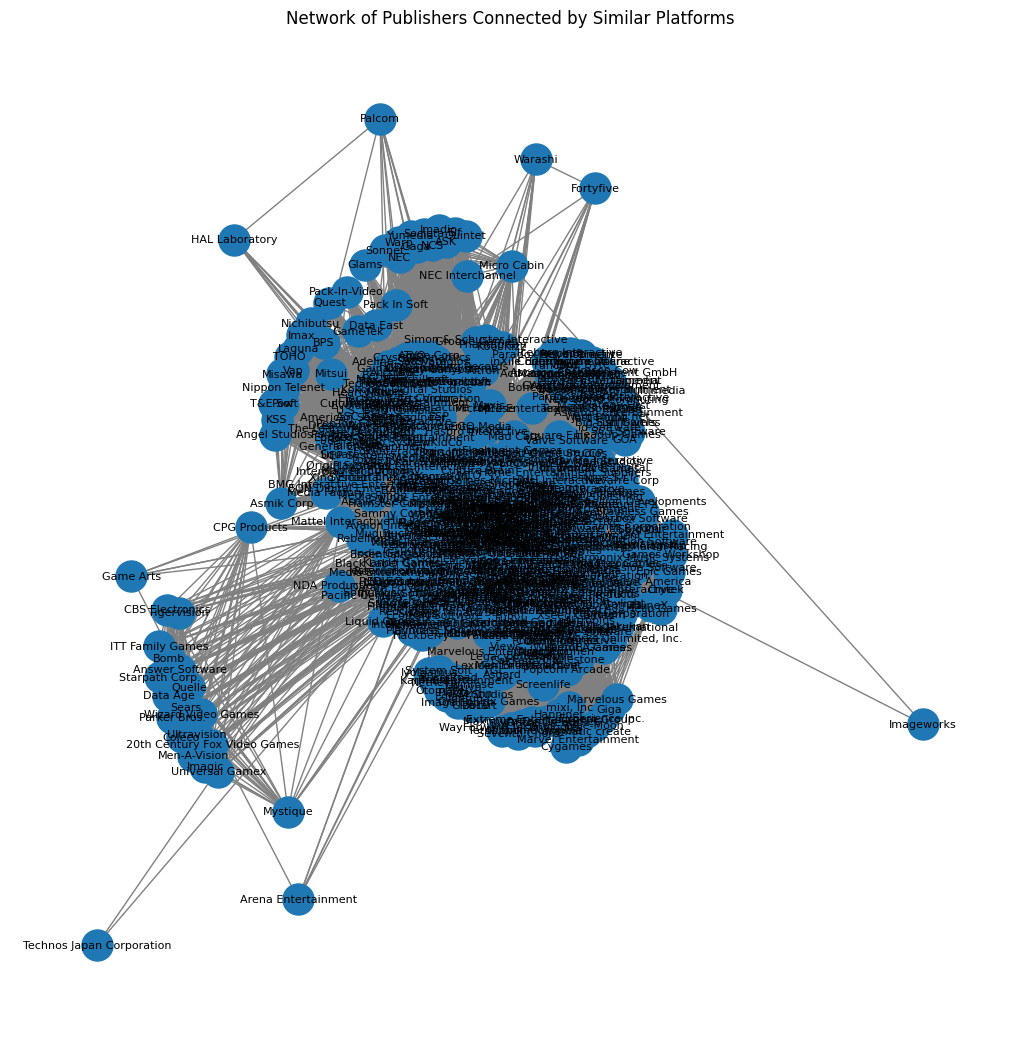

In [64]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
# Selecionando as 100 primeiras linhas para uma análise
#df = df.head(100)

# Filtragem e preparação dos dados
df_publishers = df[['Publisher', 'Platform']].dropna()

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós para cada publisher
publishers = df_publishers['Publisher'].unique()
print(publishers)
for publisher in publishers:
    G.add_node(publisher)

# Adicionar arestas com base em plataformas semelhantes
for platform in df_publishers['Platform'].unique():
    platform_publishers = df_publishers[df_publishers['Platform'] == platform]['Publisher'].unique()
    for i, pub_i in enumerate(platform_publishers):
        for j, pub_j in enumerate(platform_publishers):
            if i != j:
                if not G.has_edge(pub_i, pub_j):
                    G.add_edge(pub_i, pub_j, weight=1)
                else:
                    G[pub_i][pub_j]['weight'] += 1  # Aumenta o peso da conexão
# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, edge_color='gray')  # Mantém os names dos nós para visualização
plt.title("Network of Publishers Connected by Similar Platforms")
plt.show()


In [65]:
from collections import Counter
# Análise descritiva
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
density = nx.density(G)
degree_distribution = dict(Counter(dict(G.degree()).values()))
clustering_coefficient = nx.average_clustering(G)

print(f'Número de nós: {number_of_nodes}')
print(f'Número de arestas: {number_of_edges}')
print(f'Densidade da rede: {density:.4f}')
print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

# Análise topológica
communities = list(nx.connected_components(G))
spreading = nx.degree_assortativity_coefficient(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

print(f'Número de comunidades: {len(communities)}')
print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

Número de nós: 581
Número de arestas: 56849
Densidade da rede: 0.3374
Distribuição de graus: {294: 2, 222: 2, 523: 2, 371: 3, 545: 1, 526: 1, 349: 1, 538: 1, 490: 1, 293: 7, 528: 1, 436: 1, 559: 1, 157: 8, 560: 1, 441: 1, 259: 2, 389: 2, 498: 1, 434: 1, 206: 4, 482: 2, 171: 35, 478: 1, 296: 2, 557: 1, 11: 2, 292: 2, 514: 1, 401: 1, 334: 1, 446: 1, 381: 1, 132: 45, 270: 2, 6: 2, 483: 1, 168: 1, 384: 2, 150: 55, 25: 19, 257: 5, 506: 1, 297: 3, 181: 2, 368: 1, 542: 1, 173: 1, 102: 9, 442: 1, 74: 5, 470: 1, 394: 1, 325: 1, 176: 1, 282: 3, 277: 1, 449: 1, 432: 2, 218: 2, 319: 1, 273: 2, 413: 1, 345: 1, 465: 2, 335: 1, 178: 2, 302: 1, 463: 1, 415: 1, 193: 3, 361: 2, 505: 1, 355: 1, 172: 3, 420: 1, 300: 4, 238: 2, 267: 5, 315: 1, 423: 1, 316: 2, 304: 2, 346: 1, 230: 3, 81: 11, 268: 1, 214: 4, 380: 1, 276: 3, 357: 1, 311: 4, 322: 1, 341: 1, 453: 1, 152: 1, 49: 14, 229: 1, 170: 1, 199: 2, 188: 2, 342: 1, 210: 3, 144: 1, 353: 1, 431: 1, 383: 1, 194: 2, 324: 1, 387: 1, 53: 3, 350: 1, 86: 5, 76: 9

Desenvolvedores únicos no dataset:
SCEE
EA LA
Valve Software
Bluepoint Games
Rare Ltd.
DMA Design
Media Molecule
Neversoft Entertainment
Lionhead Studios
EA Canada
Game Freak
EA DICE
HAL Labs
EA Sports
Shiny Entertainment
Rockstar North
Zindagi Games
Team Soho
Office Create
EA Games
Sucker Punch
Harmonix Music Systems
Ubisoft Quebec
Ubisoft Montreal
Nintendo EAD Tokyo
CD Projekt Red Studio
Splash Damage
Bungie Software
Capcom
Epic Games
Mass Media
Taito Corporation
Bethesda Game Studios
Ready at Dawn
Obsidian Entertainment
The Sims Studio
SCEA
Moby Dick Studio
Namco
BudCat
Polyphony Digital
343 Industries
EA Redwood Shores
Inc.
EA Vancouver
Hudson
Electronic Arts
Spike
Luxoflux
Rocksteady Studios
Kojima Productions
The Coalition
Ubisoft
Vicarious Visions
Nd Cube
Next Level Games
Digital Eclipse
Team Bondi
Pandemic Studios
Respawn Entertainment
Ubisoft Montpellier
Argonaut Games
Sumo Digital
Indies Zero
Dimps Corporation
Gearbox Software
Intelligent Systems
Rockstar Leeds
Fox Interactiv

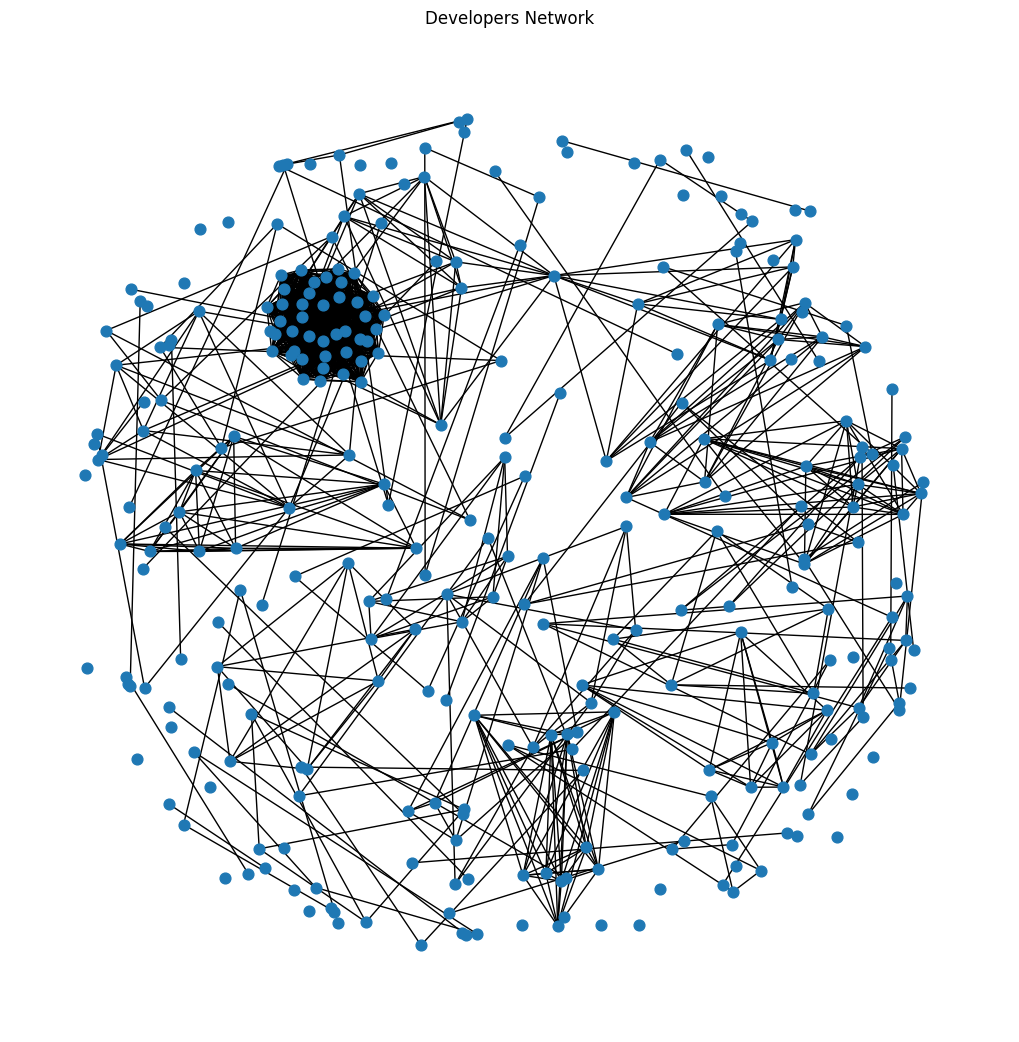

Número de componentes: 105
Componente 1:
Quantidade de jogos: 41
Jogos no componente: New Super Mario Bros., The Legend of Zelda: Twilight Princess, Wii Sports, Brain Age 2: More Training in Minutes a Day, Wii Music, Big Brain Academy: Wii Degree, Mario Kart 8, Wii Sports Resort, Rhythm Heaven, Super Mario Advance, Wii Fit Plus, Splatoon, New Super Mario Bros. U, Super Mario 3D Land, Wii Play, Flash Focus: Vision Training in Minutes a Day, New Super Mario Bros. 2, Animal Crossing: City Folk, The Legend of Zelda: A Link Between Worlds, Animal Crossing, Mario Kart DS, The Legend of Zelda: Phantom Hourglass, Animal Crossing: Happy Home Designer, Super Mario Galaxy, The Legend of Zelda: The Wind Waker, Super Mario Sunshine, Brain Age: Train Your Brain in Minutes a Day, Super Mario 3D World, The Legend of Zelda: Skyward Sword, Luigi's Mansion, Animal Crossing: New Leaf, Nintendo Land, The Legend of Zelda: Spirit Tracks, Animal Crossing: Wild World, New Super Mario Bros. Wii, Dragon Ball Z: 

In [66]:
#----------------MONTANDO REDE COM OS DESENVOLVEDORES DOS GAMES----------------

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(500) 

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero

df_developer = df[['Name', 'Developer']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_developers = set()

# Adicionar gêneros ao conjunto
for developers in df_developer['Developer'].str.split(','):
    developers = [developer.strip() for developer in developers]  # Remover espaços em branco
    unique_developers.update(developers)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Desenvolvedores únicos no dataset:")
for developer in unique_developers:
    print(developer)

number_developers = len(unique_developers)
print(f'Número de desenvolvedores: {number_developers}')


# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos desenvolvedores
for _, row in df_developer.iterrows():
    game = row['Name']
    developers = [developer.strip() for developer in row['Developer'].split(',')]  # Dividir múltiplos desenvolvedores
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, developers=developers)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um desenvolvedor
    for developer in developers:
        for other_game, other_row in df_developer.iterrows():
            if game != other_row['Name'] and developer in [dev.strip() for dev in other_row['Developer'].split(',')]:
                G.add_edge(game, other_row['Name'], developer=developer)

            
# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Developers Network")
plt.show()

#Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

# Printar os nomes dos componentes e a quantidade de nós que cada um possui
components = nx.connected_components(G)
for i, component in enumerate(components):
    print(f"Componente {i+1}:")
    print(f"Quantidade de jogos: {len(component)}")
    print(f"Jogos no componente: {', '.join(component)}\n")

In [68]:
from collections import Counter
# Análise descritiva
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
density = nx.density(G)
degree_distribution = dict(Counter(dict(G.degree()).values()))
clustering_coefficient = nx.average_clustering(G)

print(f'Número de nós: {number_of_nodes}')
print(f'Número de arestas: {number_of_edges}')
print(f'Densidade da rede: {density:.4f}')
print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

# Análise topológica
communities = list(nx.connected_components(G))
spreading = nx.degree_assortativity_coefficient(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

print(f'Número de comunidades: {len(communities)}')
print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

Número de nós: 305
Número de arestas: 1215
Densidade da rede: 0.0262
Distribuição de graus: {39: 39, 40: 1, 0: 49, 3: 30, 6: 19, 5: 16, 4: 16, 1: 50, 14: 1, 2: 38, 9: 20, 7: 7, 8: 19} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 0.6625
Número de comunidades: 105
Spreading (coeficiente de assortatividade): 0.9961
Centralidade (closeness): {'Flash Focus: Vision Training in Minutes a Day': 0.13157894736842105, 'Wii Sports': 0.12836970474967907, 'Mario Kart Wii': 0.12836970474967907, 'Wii Sports Resort': 0.12836970474967907, 'New Super Mario Bros.': 0.12836970474967907}
Centralidade (betweenness): {"Assassin's Creed: Unity": 0.0010422094841063055, 'Flash Focus: Vision Training in Minutes a Day': 0.0008467952058363731, "Uncharted: Drake's Fortune": 0.0003039777661976724, 'Guitar Hero III: Legends of Rock': 0.0002605523710265764, 'LittleBigPlanet': 0.00017370158068438424}


Total de vendas em cada região:
NA_Sales: 4402.62
EU_Sales: 2424.67
JP_Sales: 1297.43
Other_Sales: 791.34
Global_Sales: 8920.30

Correlações entre as regiões:
Correlação entre NA_Sales e EU_Sales: 0.77
Correlação entre NA_Sales e JP_Sales: 0.45
Correlação entre NA_Sales e Other_Sales: 0.64
Correlação entre NA_Sales e Global_Sales: 0.94
Correlação entre EU_Sales e JP_Sales: 0.44
Correlação entre EU_Sales e Other_Sales: 0.72
Correlação entre EU_Sales e Global_Sales: 0.90
Correlação entre JP_Sales e Other_Sales: 0.29
Correlação entre JP_Sales e Global_Sales: 0.61
Correlação entre Other_Sales e Global_Sales: 0.75

Densidade do grafo: 0.7000

Número de componentes: 1


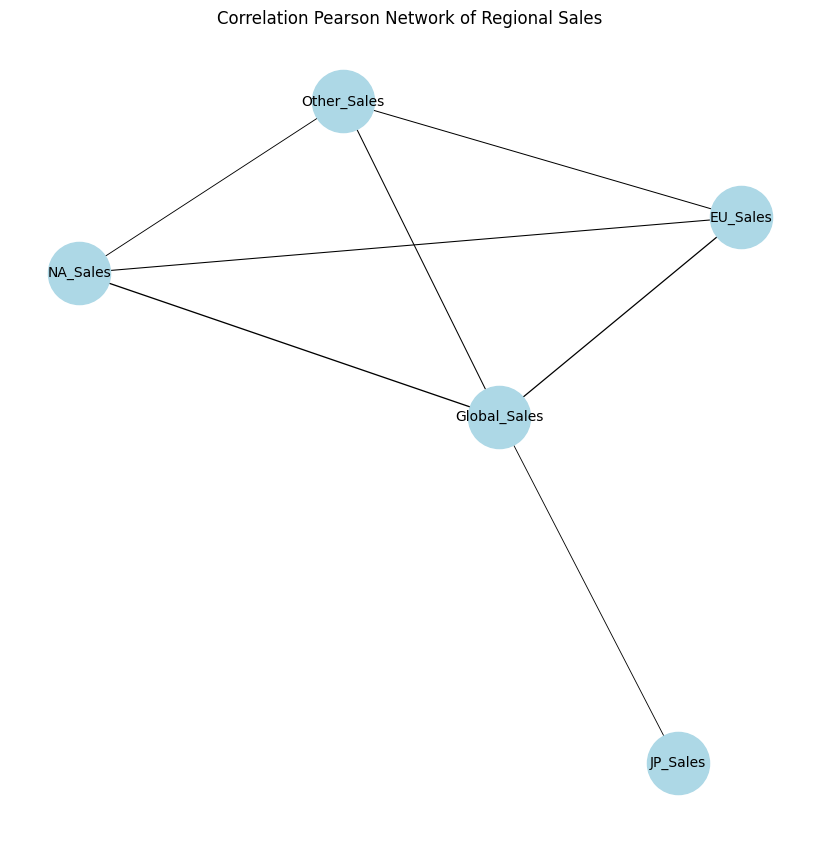

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionando as 100 primeiras linhas para uma análise
#df = df.head(100) 

# Mantém apenas as colunas de interesse: Vendas Regionais
df_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].dropna()

# Calcular e exibir a quantidade total de vendas em cada região
total_sales = df_sales.sum()
print("Total de vendas em cada região:")
for region, total in total_sales.items():
    print(f"{region}: {total:.2f}")

# Inicializando o grafo vazio
G = nx.Graph()

# Adicionar nós para cada região
regions = df_sales.columns.tolist()
G.add_nodes_from(regions)

# Dicionário para armazenar as correlações
correlation_results = {}

# Calculando a correlação de Pearson entre as regiões e adicionando as arestas
for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        correlation, _ = pearsonr(df_sales[region1], df_sales[region2])
        
        # Armazenar o resultado da correlação
        correlation_results[(region1, region2)] = correlation
        
        # Considera uma correlação forte se for maior que 0.5
        if abs(correlation) > 0.5:
            G.add_edge(region1, region2, weight=correlation)

# Exibir os resultados das correlações
print("\nCorrelações entre as regiões:")
for pair, corr_value in correlation_results.items():
    print(f"Correlação entre {pair[0]} e {pair[1]}: {corr_value:.2f}")

# Calcular a densidade do grafo
density = nx.density(G)
print(f'\nDensidade do grafo: {density:.4f}')

# Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'\nNúmero de componentes: {number_communities}')

# Desenhando o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(8, 8))

# A cor e espessura das arestas indicam a força da correlação
edges = G.edges(data=True)
weights = [abs(data['weight']) for _, _, data in edges]
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, width=weights)

plt.title("Correlation Pearson Network of Regional Sales")
plt.show()


In [70]:
from collections import Counter
# Análise descritiva
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
density = nx.density(G)
degree_distribution = dict(Counter(dict(G.degree()).values()))
clustering_coefficient = nx.average_clustering(G)

print(f'Número de nós: {number_of_nodes}')
print(f'Número de arestas: {number_of_edges}')
print(f'Densidade da rede: {density:.4f}')
print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

# Análise topológica
communities = list(nx.connected_components(G))
spreading = nx.degree_assortativity_coefficient(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

print(f'Número de comunidades: {len(communities)}')
print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

Número de nós: 5
Número de arestas: 7
Densidade da rede: 0.7000
Distribuição de graus: {3: 3, 1: 1, 4: 1} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 0.7000
Número de comunidades: 1
Spreading (coeficiente de assortatividade): -0.5556
Centralidade (closeness): {'Global_Sales': 1.0, 'NA_Sales': 0.8, 'EU_Sales': 0.8, 'Other_Sales': 0.8, 'JP_Sales': 0.5714285714285714}
Centralidade (betweenness): {'Global_Sales': 0.5, 'NA_Sales': 0.0, 'EU_Sales': 0.0, 'JP_Sales': 0.0, 'Other_Sales': 0.0}


ANÁLISE COM OS VALORES DE CRITICAS DO SITE DO METACRITIC


Análise Descritiva para a rede "Rede de Jogos - Critic Score":
Número de nós: 645
Número de arestas: 4149
Densidade da rede: 0.0200
Distribuição de graus: {7: 15, 14: 29, 15: 58, 13: 41, 12: 49, 0: 5, 20: 100, 1: 19, 5: 10, 9: 50, 8: 27, 6: 40, 21: 2, 37: 5, 10: 14, 16: 2, 17: 73, 4: 29, 3: 20, 22: 13, 38: 1, 31: 3, 2: 18, 11: 8, 26: 3, 45: 1, 29: 2, 28: 1, 34: 3, 47: 1, 32: 1, 35: 1, 39: 1} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - Critic Score":
Número de comunidades: 23
Spreading (coeficiente de assortatividade): 0.3565
Centralidade (closeness): {73: 0.16653778307377737, 110: 0.16653778307377737, 114: 0.16653778307377737, 192: 0.16653778307377737, 212: 0.16653778307377737}
Centralidade (betweenness): {'FIFA Soccer 13': 0.26305787710603445, "Assassin's Creed IV: Black Flag": 0.18856810614786193, 'Guitar Hero III: Legends of Rock': 0.15525352453166033, 'Fallout 3': 0.13827177087614972, 'FIFA 14': 0.13181064

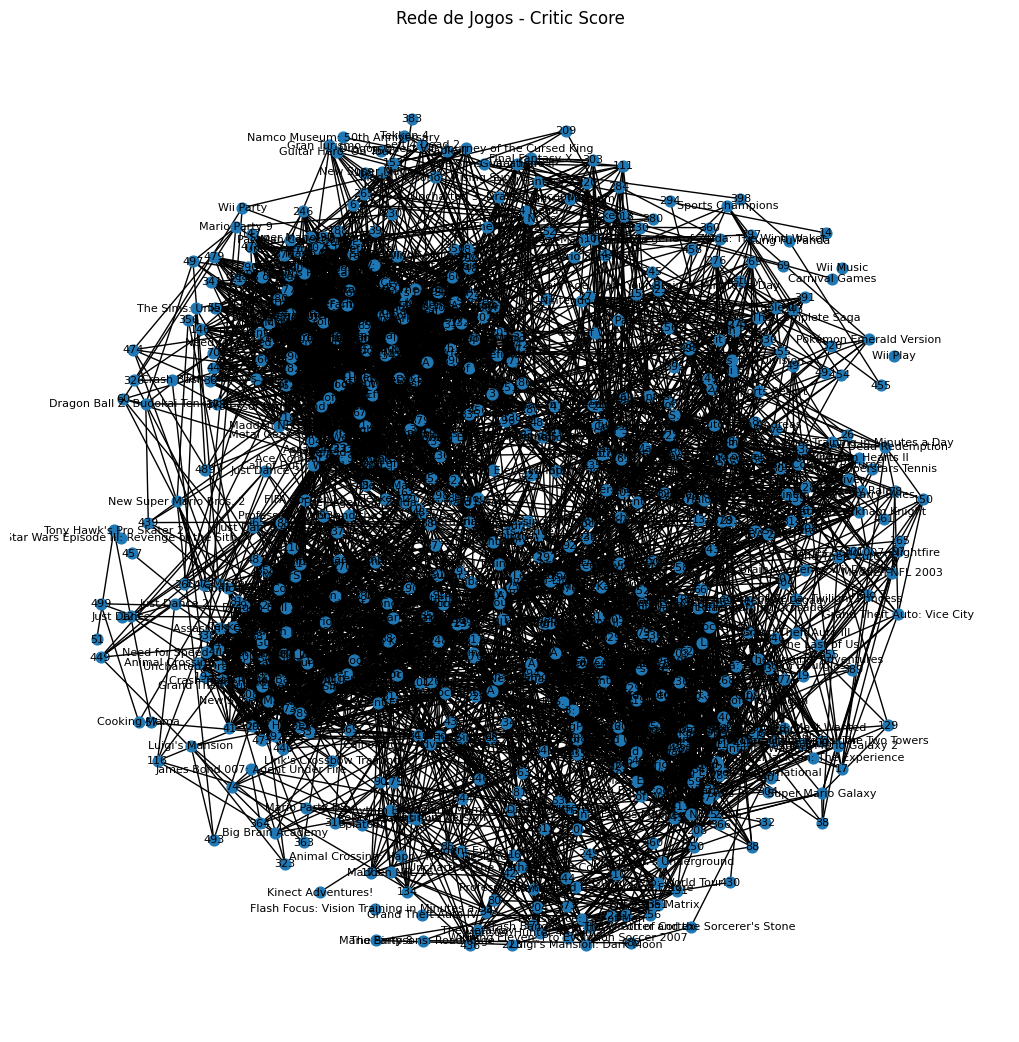

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 100 primeiras linhas para uma análise
df = df.head(500)

# Filtragem e preparação dos dados
df_critic_score = df[['Name', 'Critic_Score']].dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
    print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos Critic_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['Critic_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um Critic_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['Critic_Score']) - float(other_row['Critic_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar uma única rede com todos os jogos
build_and_analyze_network(df_critic_score, "Rede de Jogos - Critic Score")




Análise Descritiva para a rede "Rede de Jogos - User Score":
Número de nós: 652
Número de arestas: 35982
Densidade da rede: 0.1695
Distribuição de graus: {154: 27, 137: 28, 149: 19, 152: 25, 119: 27, 125: 21, 143: 30, 114: 27, 106: 12, 113: 12, 153: 9, 138: 21, 128: 11, 162: 16, 108: 14, 43: 6, 32: 8, 63: 5, 33: 6, 56: 4, 38: 7, 34: 4, 52: 4, 50: 6, 26: 2, 29: 2, 169: 8, 91: 10, 135: 19, 94: 7, 69: 11, 80: 9, 36: 4, 23: 2, 19: 3, 22: 2, 103: 6, 206: 1, 76: 12, 47: 4, 142: 15, 147: 18, 3: 3, 8: 10, 9: 3, 39: 4, 13: 3, 11: 9, 10: 4, 35: 1, 126: 15, 168: 12, 129: 12, 164: 1, 117: 6, 16: 1, 78: 6, 61: 3, 87: 6, 243: 1, 14: 2, 7: 2, 127: 9, 139: 1, 24: 1, 95: 10, 120: 1, 44: 1, 49: 1, 62: 1, 159: 11, 54: 7, 140: 1, 160: 1, 151: 1, 116: 1, 183: 1, 223: 1, 231: 1, 4: 1, 2: 1, 247: 1, 148: 1, 57: 1, 86: 1, 186: 1, 28: 1, 20: 1, 177: 1, 171: 2, 27: 2} (OBS: Grau: Quantidade de Nós)
Coeficiente de clustering médio: 0.0000

Análise Topológica para a rede "Rede de Jogos - User Score":
Número de c

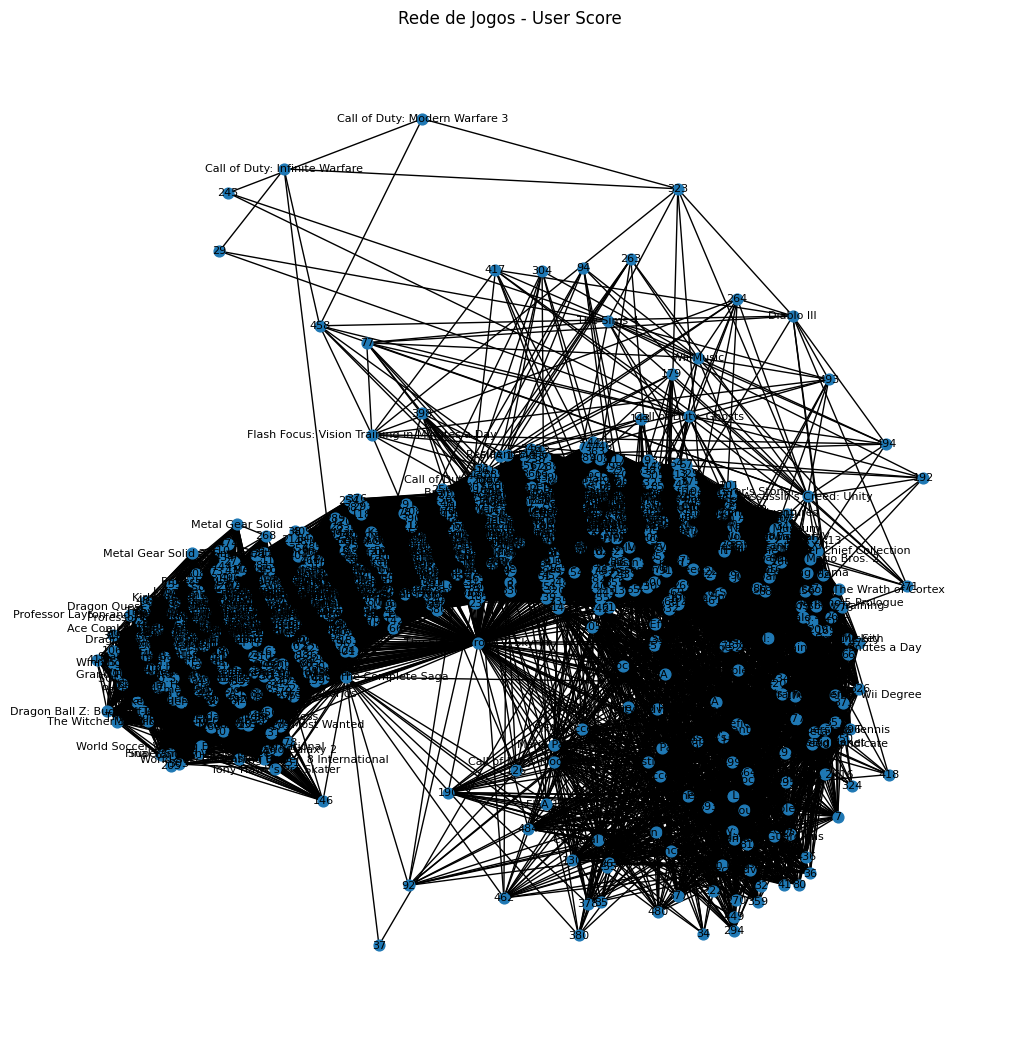

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Carregar o dataset
df = pd.read_csv('data_game.csv')

# Selecionar as 500 primeiras linhas para uma análise
df = df.head(500)

# Filtragem e preparação dos dados
df_user_score = df[['Name', 'User_Score']].dropna()

# Substituir valores não numéricos por NaN e remover esses valores
df_user_score['User_Score'] = pd.to_numeric(df_user_score['User_Score'], errors='coerce')
df_user_score = df_user_score.dropna()

# Função para calcular e imprimir análise descritiva e topológica
def analyze_network(G, title):
    # Análise descritiva
    number_of_nodes = G.number_of_nodes()
    number_of_edges = G.number_of_edges()
    density = nx.density(G)
    degree_distribution = dict(Counter(dict(G.degree()).values()))
    clustering_coefficient = nx.average_clustering(G)
    
    print(f'\nAnálise Descritiva para a rede "{title}":')
    print(f'Número de nós: {number_of_nodes}')
    print(f'Número de arestas: {number_of_edges}')
    print(f'Densidade da rede: {density:.4f}')
    print(f'Distribuição de graus: {degree_distribution} (OBS: Grau: Quantidade de Nós)')
    print(f'Coeficiente de clustering médio: {clustering_coefficient:.4f}')

    # Análise topológica
    communities = list(nx.connected_components(G))
    spreading = nx.degree_assortativity_coefficient(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    print(f'\nAnálise Topológica para a rede "{title}":')
    print(f'Número de comunidades: {len(communities)}')
    print(f'Spreading (coeficiente de assortatividade): {spreading:.4f}')
    print(f'Centralidade (closeness): {dict(sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5
    print(f'Centralidade (betweenness): {dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:5])}')  # Top 5

    # Desenhar o grafo
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=60, font_size=8)  # Exibir os nomes dos nós
    plt.title(title)
    plt.show()

# Função para construir e analisar a rede
def build_and_analyze_network(df_filtered, title, threshold=0.5):
    # Criar um grafo vazio
    G = nx.Graph()

    # Adicionar nós e arestas com base nos User_Scores
    for _, row in df_filtered.iterrows():
        game = row['Name']
        
        # Adicionar o nó para o jogo
        if not G.has_node(game):
            G.add_node(game, score=row['User_Score'])
        
        # Conectar o jogo atual a outros jogos que compartilham um User_Score próximo
        for other_game, other_row in df_filtered.iterrows():
            if game != other_row['Name']:
                score_diff = abs(float(row['User_Score']) - float(other_row['User_Score']))
                if score_diff <= threshold:  # Criar aresta apenas se a diferença for menor ou igual ao threshold
                    G.add_edge(game, other_game)

    # Analisar a rede
    analyze_network(G, title)

# Criar uma única rede com todos os jogos
build_and_analyze_network(df_user_score, "Rede de Jogos - User Score")


ANÁLISE DE REDE DE JOGOS PARA TODA A BASE, SEM ALGUMAS ANÁLISES E SEM PLOTAGEM

In [46]:
#REDE DE JOGOS E GÊNEROS
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Carregar a base de dados
file_path = 'data_game.csv'  # substitua pelo caminho correto do seu arquivo
df = pd.read_csv(file_path)

# Etapa de filtragem: criar um CSV com apenas nomes e gêneros
filtered_df = df[['Name', 'Genre']]
filtered_file_path = 'filtered_games_genres.csv'
filtered_df.to_csv(filtered_file_path, index=False)

# Recarregar o arquivo filtrado (opcional, mas mantido para clareza)
filtered_df = pd.read_csv(filtered_file_path)

# Criar uma rede onde os nós são jogos e as arestas conectam jogos do mesmo gênero
G = nx.Graph()

# Adicionar nós (jogos) à rede
for index, row in filtered_df.iterrows():
    G.add_node(row['Name'], genre=row['Genre'])

# Adicionar arestas entre jogos que possuem o mesmo gênero de forma otimizada
genre_to_games = defaultdict(list)
for _, row in filtered_df.iterrows():
    genre_to_games[row['Genre']].append(row['Name'])

# Adicionar arestas para todos os jogos no mesmo gênero
for games in genre_to_games.values():
    if len(games) > 1:
        # Adiciona todas as arestas possíveis entre jogos do mesmo gênero
        G.add_edges_from((games[i], games[j]) for i in range(len(games)) for j in range(i + 1, len(games)))

# Análises da rede
num_nos = G.number_of_nodes()
num_arestas = G.number_of_edges()
num_comunidades = nx.number_connected_components(G)

# Exibir apenas os resultados solicitados
print(f"Número de nós: {num_nos}")
print(f"Número de arestas: {num_arestas}")
print(f"Número de comunidades: {num_comunidades}")




Número de nós: 11563
Número de arestas: 6626486
Número de comunidades: 9


In [48]:
#REDE DE JOGOS E DESENVOLVEDORES
import pandas as pd
import networkx as nx
from collections import defaultdict

# Carregar a base de dados
file_path = 'data_game.csv'  # substitua pelo caminho correto do seu arquivo
df = pd.read_csv(file_path)

# Etapa de filtragem: criar um CSV com apenas nomes e desenvolvedores
filtered_df = df[['Name', 'Developer']]
filtered_file_path = 'filtered_games_developers.csv'
filtered_df.to_csv(filtered_file_path, index=False)

# Recarregar o arquivo filtrado (opcional, mas mantido para clareza)
filtered_df = pd.read_csv(filtered_file_path)

# Criar uma rede onde os nós são jogos e as arestas conectam jogos do mesmo desenvolvedor
G = nx.Graph()

# Adicionar nós (jogos) à rede
for index, row in filtered_df.iterrows():
    G.add_node(row['Name'], developer=row['Developer'])

# Adicionar arestas entre jogos que possuem o mesmo desenvolvedor de forma otimizada
developer_to_games = defaultdict(list)
for _, row in filtered_df.iterrows():
    developer_to_games[row['Developer']].append(row['Name'])

# Adicionar arestas para todos os jogos com o mesmo desenvolvedor
for games in developer_to_games.values():
    if len(games) > 1:
        # Adiciona todas as arestas possíveis entre jogos do mesmo desenvolvedor
        G.add_edges_from((games[i], games[j]) for i in range(len(games)) for j in range(i + 1, len(games)))

# Análises da rede
num_nos = G.number_of_nodes()
num_arestas = G.number_of_edges()
num_comunidades = nx.number_connected_components(G)

# Exibir apenas os resultados solicitados
print(f"Número de nós: {num_nos}")
print(f"Número de arestas: {num_arestas}")
print(f"Número de comunidades: {num_comunidades}")


Número de nós: 11563
Número de arestas: 16537187
Número de comunidades: 1070
